In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("C:\\Users\\thris\\Desktop\\bestsellerswithcategories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [109]:
df.drop_duplicates()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [110]:
df["Genre"].value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

Text(0.5, 1.0, 'Non Fiction vs Fiction')

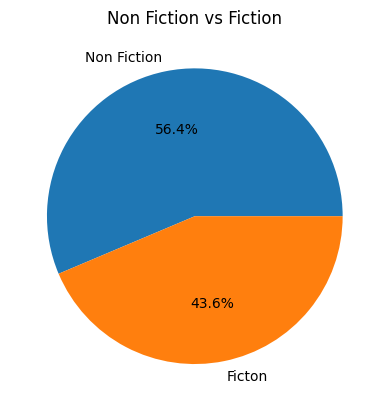

In [111]:
nf=df[df["Genre"]=="Non Fiction"].shape[0]
f=df[df["Genre"]=="Fiction"].shape[0]

tot=nf+f
p_non=(nf/tot)*100
p_fic=(f/tot)*100

labels=["Non Fiction","Ficton"]
data=[p_non,p_fic]
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Non Fiction vs Fiction")

NON FICTION GENRE BOOKS ARE THE BESTSELLING WHEN COMPARED TO FICTION

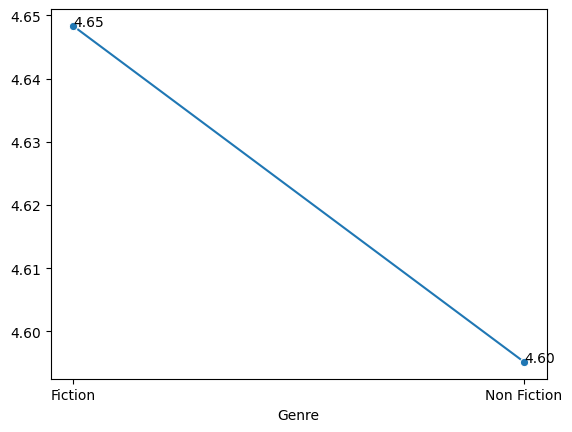

In [112]:
new=df.groupby("Genre")["User Rating"].mean()

sns.lineplot(x=new.index,y=new.values,marker="o")
for i, v in enumerate(new.values):
    plt.text(i, v, f"{v:.2f}")

EVEN THOUGH, FICTION GENRE IS 2ND BEST SELLING GENRE BOOKS, IT HAS THE HIGHEST AVG RATING.

In [113]:
df["Year"].value_counts()

Year
2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: count, dtype: int64

In [114]:
new1 = df[df['Genre'] == 'Fiction']["Year"].value_counts()

new2 = df[df['Genre'] == 'Fiction']["Year"].value_counts()

print(new1)
print(new2)

Year
2014    29
2017    24
2013    24
2009    24
2011    21
2018    21
2012    21
2019    20
2010    20
2016    19
2015    17
Name: count, dtype: int64
Year
2014    29
2017    24
2013    24
2009    24
2011    21
2018    21
2012    21
2019    20
2010    20
2016    19
2015    17
Name: count, dtype: int64


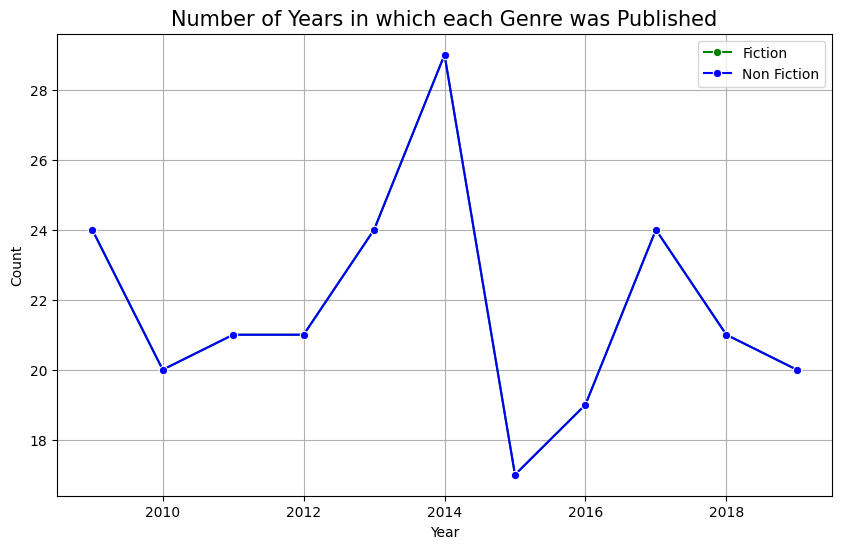

In [115]:

plt.figure(figsize=(10,6))
sns.lineplot(x=new1.index,y=new1.values,marker="o",color="green",label="Fiction")
sns.lineplot(x=new2.index,y=new2.values,marker="o",color="blue",label="Non Fiction")  
plt.legend(loc='upper right')

plt.title('Number of Years in which each Genre was Published', fontsize=15)
plt.xlabel("Year",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.grid(True)

plt.show()

In [116]:
THIS INDICATES THAT BOTH THE COUNT OF GENRES ARE THE SAME FOR EVERY YEAR.

SyntaxError: invalid syntax (3463469444.py, line 1)

In [ ]:
dff=df.groupby("Author")["User Rating"].max().head(10)
dff

Author
Abraham Verghese               4.6
Adam Gasiewski                 4.4
Adam Mansbach                  4.8
Adir Levy                      4.8
Admiral William H. McRaven     4.7
Adult Coloring Book Designs    4.5
Alan Moore                     4.8
Alex Michaelides               4.5
Alice Schertle                 4.9
Allie Brosh                    4.7
Name: User Rating, dtype: float64

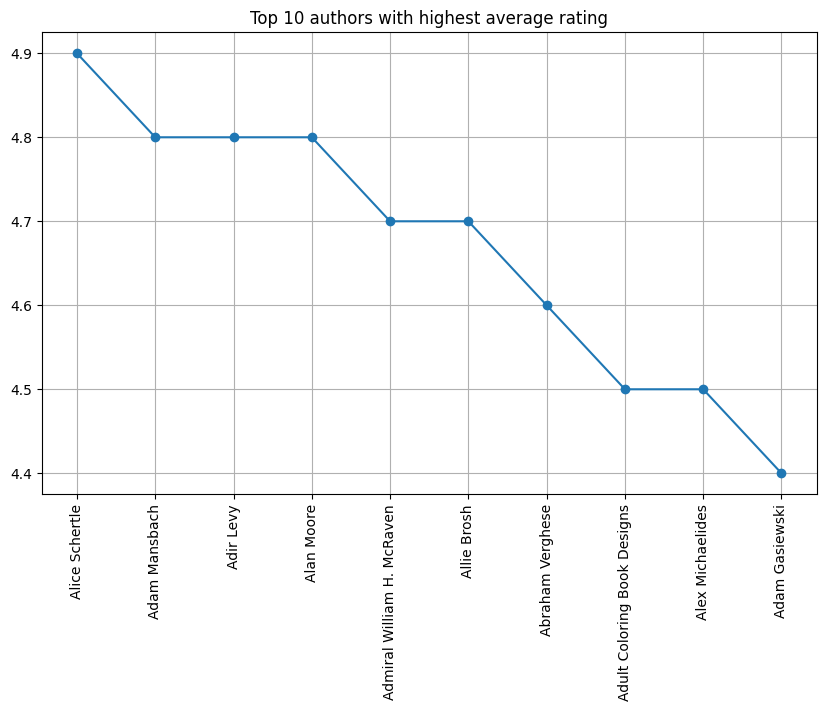

In [ ]:
dff = dff.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(dff.index, dff.values, marker="o")
plt.xticks(rotation=90)
plt.title("Top 10 authors with highest average rating")
plt.grid()

plt.show()

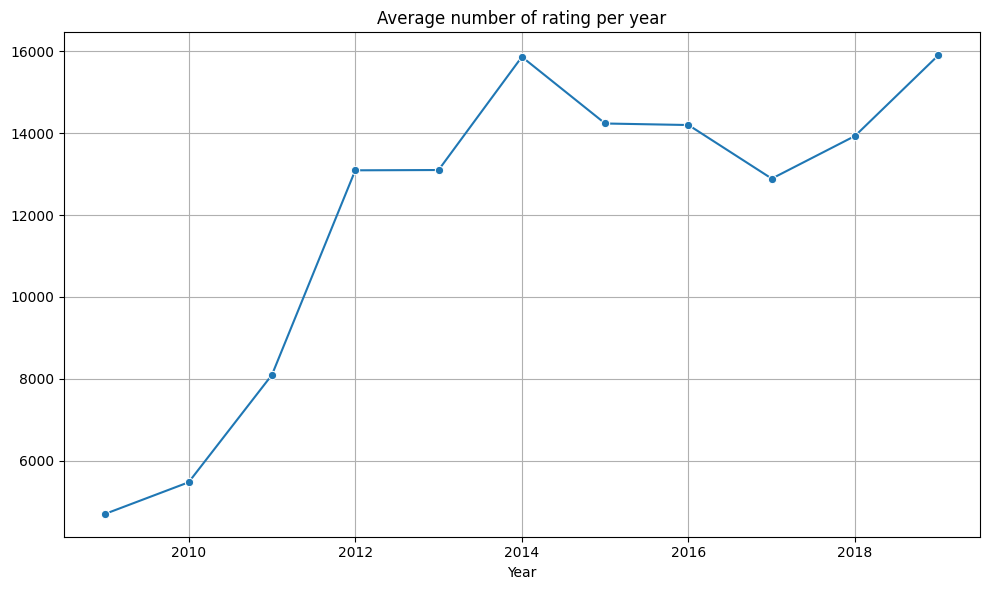

In [ ]:
dff1=df.groupby("Year")["Reviews"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=dff1.index,y=dff1.values,marker="o")
plt.title("Average number of rating per year")
plt.tight_layout()
plt.grid()

plt.show()


    

In [ ]:
df.groupby("Name")["User Rating"].mean().sort_values(ascending=False)

Name
Hamilton: The Revolution                                                                     4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2)    4.9
Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)        4.9
Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)     4.9
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)      4.9
                                                                                            ... 
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                          3.9
Allegiant                                                                                    3.9
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)     3.8
Go Set a Watchman: A Novel                                                                   3.6
The Casual Vacancy       

In [ ]:
df.groupby("Name")["User Rating"].mean().sort_values(ascending=True)

Name
The Casual Vacancy                                                                                                         3.3
Go Set a Watchman: A Novel                                                                                                 3.6
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)                                   3.8
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                                        3.9
Allegiant                                                                                                                  3.9
                                                                                                                          ... 
The Very Hungry Caterpillar                                                                                                4.9
The Wonderful Things You Will Be                                                                          

<Axes: xlabel='Price', ylabel='Count'>

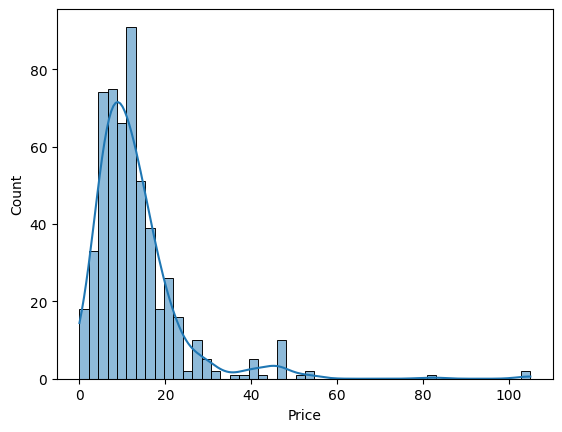

In [ ]:
sns.histplot(x="Price",data=df,kde=True)

<Axes: xlabel='User Rating', ylabel='Count'>

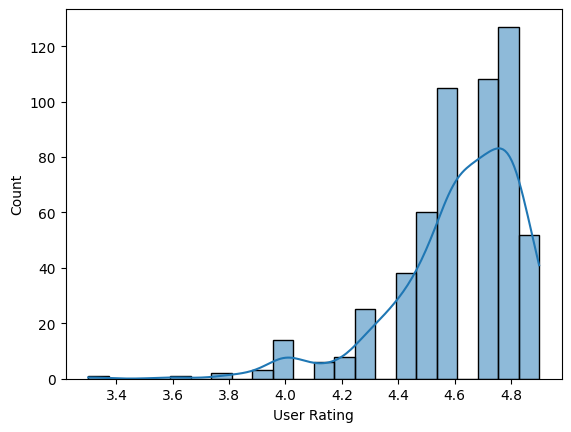

In [ ]:
sns.histplot(x="User Rating",data=df,kde=True)

<Axes: xlabel='Reviews', ylabel='Count'>

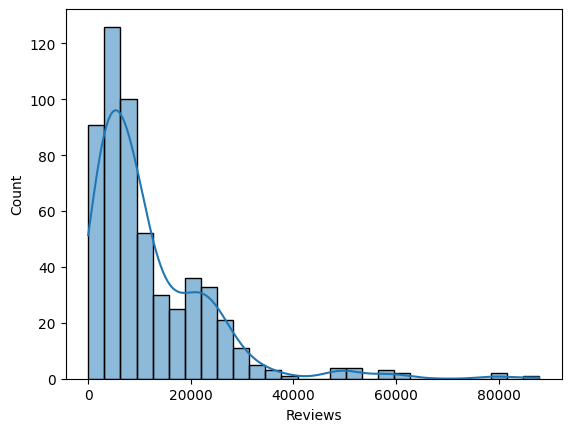

In [ ]:
sns.histplot(x="Reviews",data=df,kde=True)

<Axes: xlabel='Price', ylabel='Reviews'>

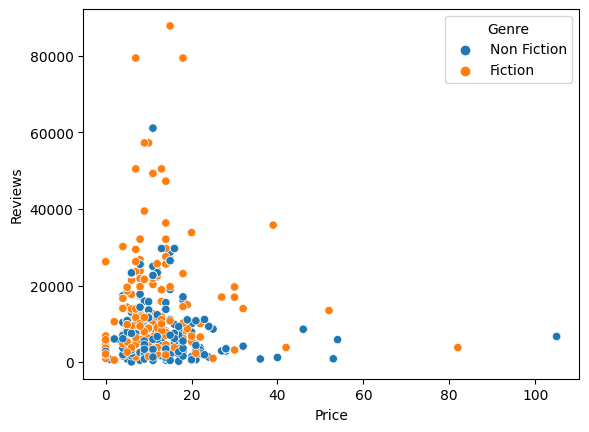

In [ ]:
sns.scatterplot(x="Price",y="Reviews",data=df,hue="Genre")

<Axes: xlabel='Genre', ylabel='Reviews'>

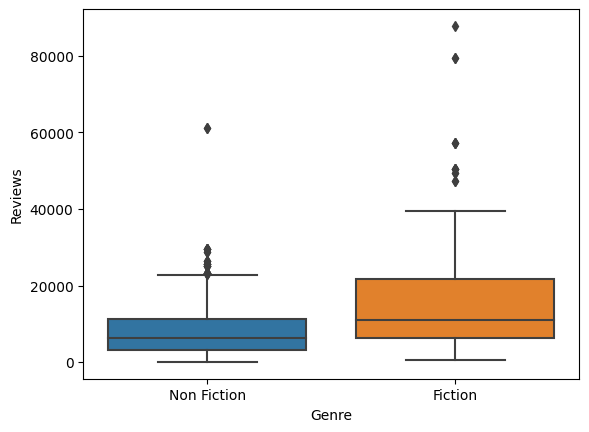

In [ ]:
sns.boxplot(x="Genre", y="Reviews", data=df)

<Axes: xlabel='Genre', ylabel='Reviews'>

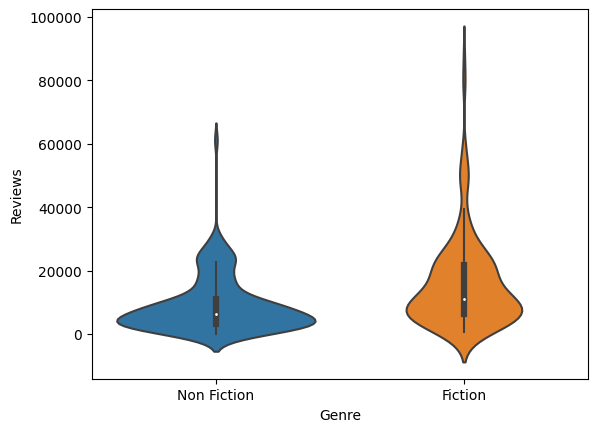

In [ ]:
sns.violinplot(x="Genre", y="Reviews", data=df)

<Axes: xlabel='Genre', ylabel='User Rating'>

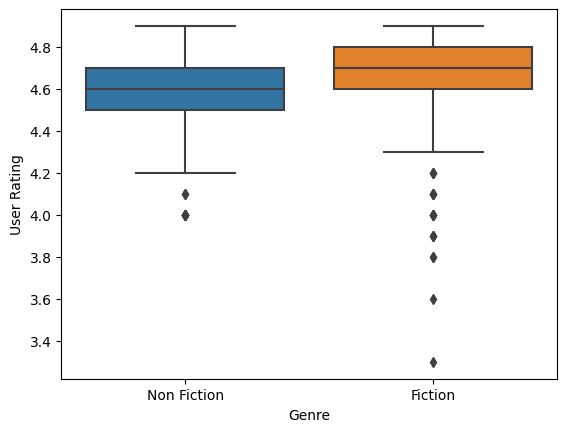

In [94]:
sns.boxplot(x="Genre", y="User Rating", data=df)


<Axes: xlabel='Genre', ylabel='Price'>

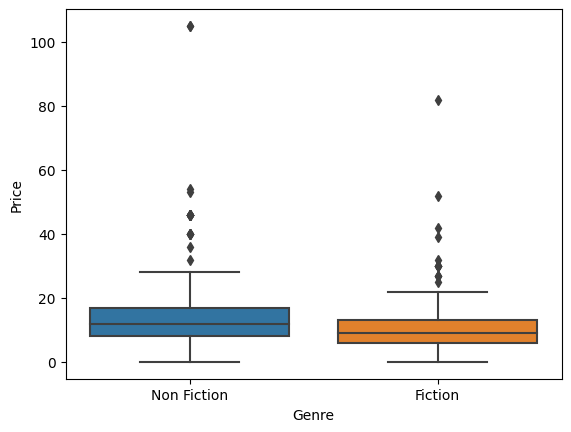

In [123]:
sns.boxplot(x="Genre", y="Price", data=df)


<Axes: xlabel='Year', ylabel='User Rating'>

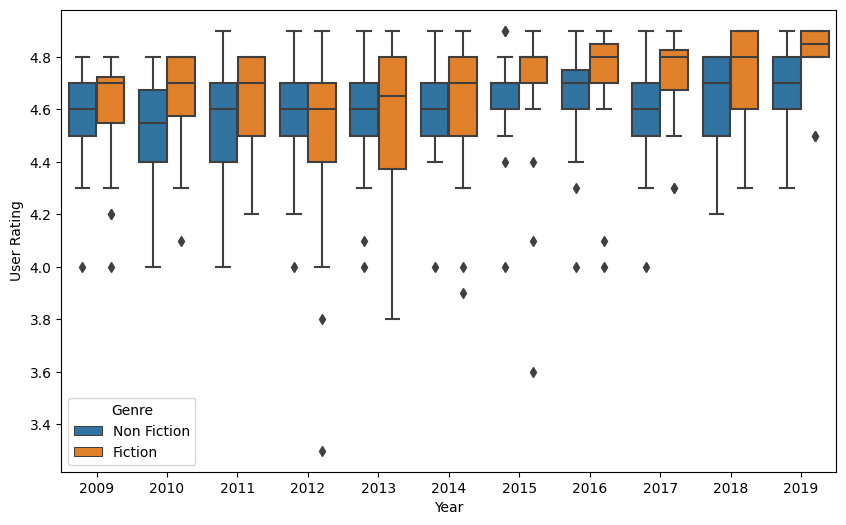

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Year", y="User Rating", data=df,hue="Genre")


<Axes: xlabel='Year', ylabel='Reviews'>

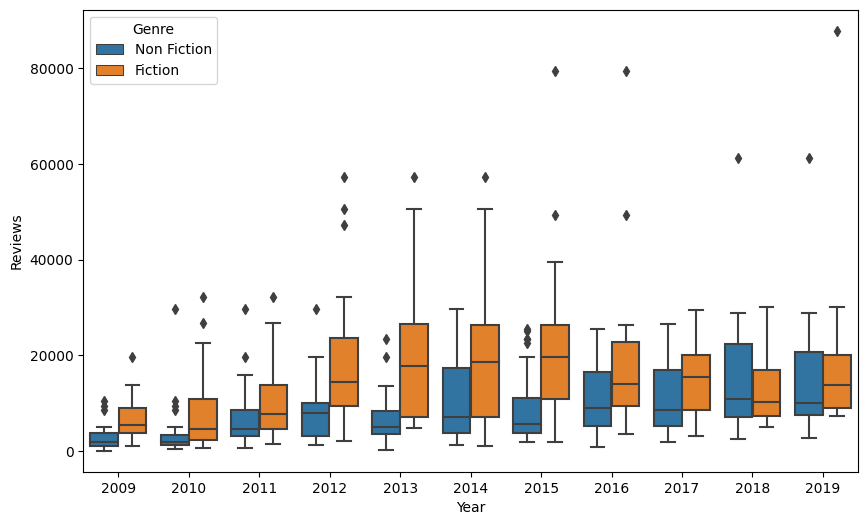

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Year", y="Reviews", data=df,hue="Genre")


<Axes: xlabel='Year', ylabel='Price'>

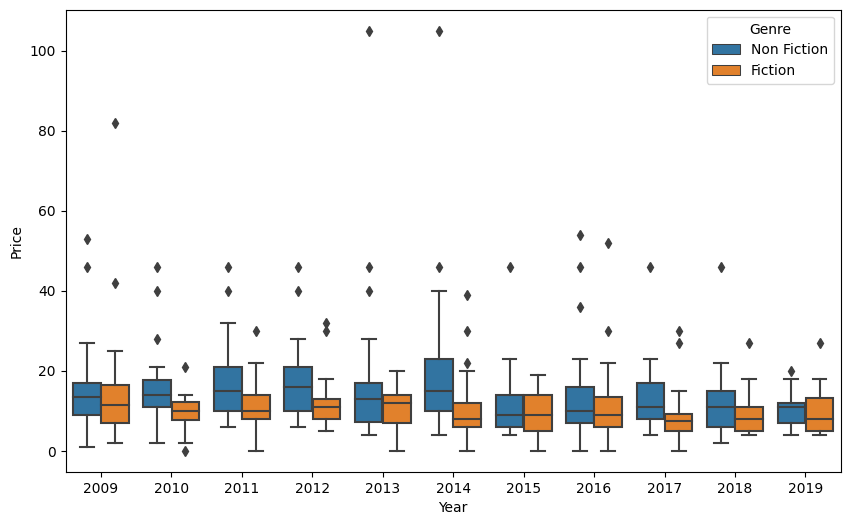

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Year", y="Price", data=df,hue="Genre")
